In [ ]:

import numpy as np  
import pandas as pd 

import os


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
# train = pd.read_csv('../input/digit-recognizer/train.csv')
# test = pd.read_csv('../input/digit-recognizer/test.csv')

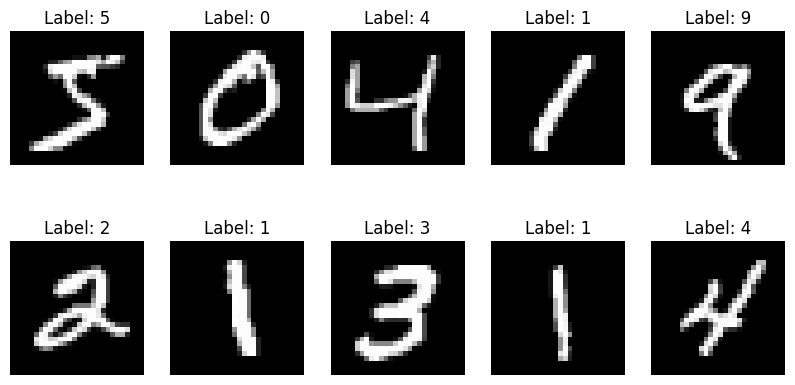

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [7]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



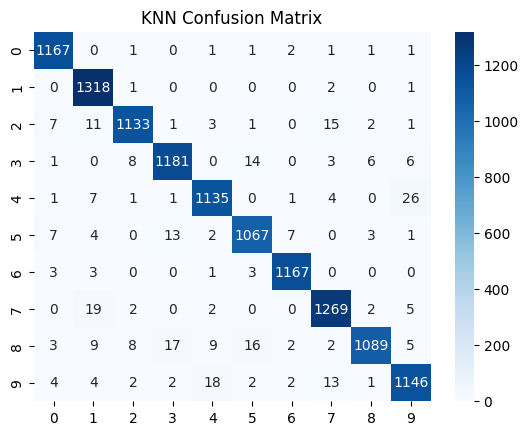

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



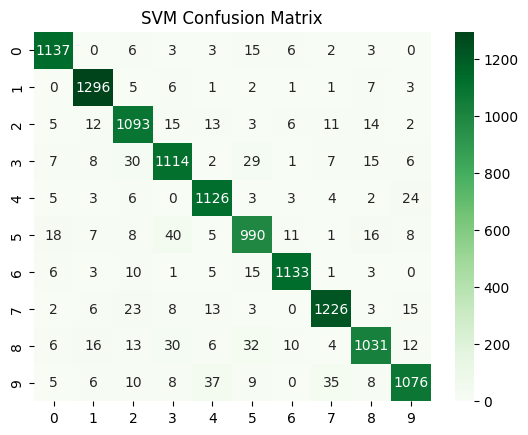

In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [10]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9351


KNN Validation Accuracy: 0.8640
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1175
           1       0.93      0.96      0.94      1322
           2       0.85      0.84      0.85      1174
           3       0.84      0.83      0.83      1219
           4       0.85      0.86      0.85      1176
           5       0.84      0.82      0.83      1104
           6       0.89      0.89      0.89      1177
           7       0.90      0.90      0.90      1299
           8       0.81      0.79      0.80      1160
           9       0.81      0.83      0.82      1194

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



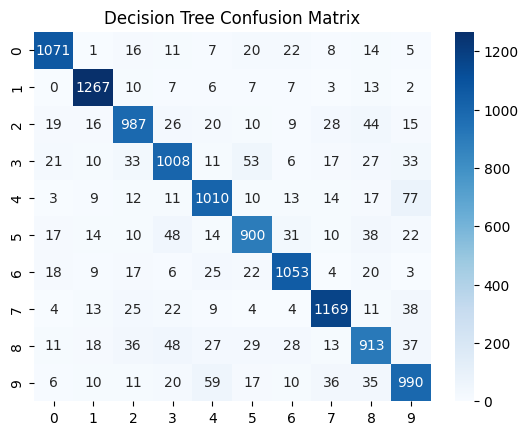

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_split, y_train_split)

y_val_pred_dt = dt.predict(X_val)

dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'KNN Validation Accuracy: {dt_acc:.4f}')

print(classification_report(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [16]:
!pip install xgboost

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_split,y_train_split)
y_pred_xg = model.predict(X_val)
acc_xg = accuracy_score(y_val,y_pred_xg)
print(acc_xg)

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 3.1/124.9 MB 15.3 MB/s eta 0:00:08
   - -------------------------------------- 6.0/124.9 MB 14.7 MB/s eta 0:00:09
   -- ------------------------------------- 8.9/124.9 MB 13.8 MB/s eta 0:00:09
   --- ------------------------------------ 11.0/124.9 MB 13.5 MB/s eta 0:00:09
   --- ------------------------------------ 12.3/124.9 MB 12.1 MB/s eta 0:00:10
   ---- ----------------------------------- 14.7/124.9 MB 11.5 MB/s eta 0:00:10
   ----- ---------------------------------- 17.6/124.9 MB 11.8 MB/s eta 0:00:10
   ------ --------------------------------- 20.4/124.9 MB 12.1 MB/s eta 0:00:09
   ------- -------------------------------- 23.6/124.9 MB 12.3 MB/s eta 0:00:09
   -------- ------------------------------- 26.5/124.9 MB 12.6 MB/s eta 0:00:08
   --------- ------------------------------ 29.9/124.9 MB 12.7 MB/s eta 0:00:08
   ---------- ----------------------------- 32.5/124

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.98      0.98      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.97      1299
           8       0.97      0.98      0.97      1160
           9       0.96      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



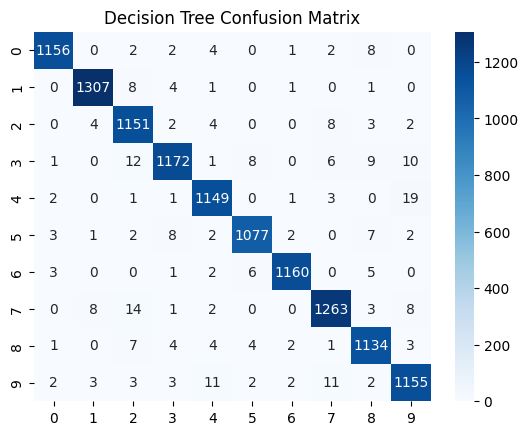

In [17]:
print(classification_report(y_val, y_pred_xg))
sns.heatmap(confusion_matrix(y_val, y_pred_xg), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [ ]:

from sklearn.model_selection import GridSearchCV
# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train_split, y_train_split)


print("Random Forest Best Params:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)


rf_best = rf_grid_search.best_estimator_
rf_predictions = rf_best.predict(X_val)
print("Random Forest Test Accuracy:", accuracy_score(y_val, rf_predictions))
print(classification_report(y_val, rf_predictions))

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


knn_clf = KNeighborsClassifier()


knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
knn_grid_search.fit(X_train_split, y_train_split)


print("KNN Best Params:", knn_grid_search.best_params_)
print("KNN Best Score:", knn_grid_search.best_score_)

knn_best = knn_grid_search.best_estimator_
knn_predictions = knn_best.predict(X_val)
print("KNN Test Accuracy:", accuracy_score(y_val, knn_predictions))
print(classification_report(y_val, knn_predictions))
knn_predictions = knn_clf.predict(X_test_reduced)
print("KNN Test(PCA) Accuracy:", accuracy_score(y_val, knn_predictions))
print(classification_report(y_val, knn_predictions))

In [ ]:
knn_predictions = knn_clf.predict(X_test_reduced)
print("KNN Test(PCA) Accuracy:", accuracy_score(y_val, knn_predictions))
print(classification_report(y_val, knn_predictions))

In [ ]:
xgb_predictions = model.predict(X_test_reduced)
print("XGB Test(PCA) Accuracy:", accuracy_score(y_val, xgb_predictions))
print(classification_report(y_val, xgb_predictions))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # Reduce 784 features to 50
X_train_reduced = pca.fit_transform(X_train_split)
X_test_reduced = pca.transform(X_val)
